In [2]:
!python -V

Python 3.9.13


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold, cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_csv("Fortune5002017.csv")

In [5]:
to_drop = [
    'Rank',
    'Title',
    'Website',
    'Sector',
    'Industry',
    'Hqlocation',
    'Hqaddr',
    'Hqcity',
    'Hqstate',
    'Hqzip',
    'Hqtel',
    'Ceo',
    'Ceo-title',
    'Address',
    'Ticker',
    'Fullname'
]
df.drop(columns=to_drop, inplace=True)

In [6]:
df.head()

,Employees,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,2300000,485873,0.8,13643.0,-7.2,198825,77798.0
1,367700,223604,6.1,24074.0,0,620854,283001.0
2,116000,215639,-7.7,45687.0,-14.4,321686,128249.0
3,72700,205004,-16.7,7840.0,-51.5,330314,167325.0
4,68000,192487,6.2,2258.0,53,56563,8924.0


In [7]:
df.dtypes

Employees        int64
Revenues         int64
Revchange      float64
Profits        float64
Prftchange      object
Assets           int64
Totshequity    float64
dtype: object

In [8]:
# Remove profit change outliers and change its type to float from object
non_num = df.Prftchange.str.contains('[,]')
df.loc[non_num].head()
df = df.loc[~non_num]
df.Prftchange = df.Prftchange.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employees    494 non-null    int64  
 1   Revenues     494 non-null    int64  
 2   Revchange    494 non-null    float64
 3   Profits      494 non-null    float64
 4   Prftchange   494 non-null    float64
 5   Assets       494 non-null    int64  
 6   Totshequity  494 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 30.9 KB


In [9]:
outcome = []
for col in df['Profits']:
    if col >= 500:
        outcome.append(1)
    else:
        outcome.append(0)
df.insert(7, 'outcome', outcome)

one 299
zero 195
[299, 195]


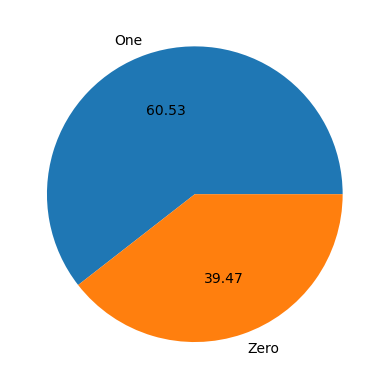

In [10]:
one = 0
zero = 0
res=[]
for i in df['outcome']:
    if i ==1:
        one+=1
    else:
        zero+=1
print('one', one)
print('zero', zero)
res.append(one)
res.append(zero)
labels=['One','Zero']
print(res)
plt.pie(res, labels=labels, autopct='%.2f')
plt.show()

In [11]:
df.head()

,Employees,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,outcome
0,2300000,485873,0.8,13643.0,-7.2,198825,77798.0,1
1,367700,223604,6.1,24074.0,0.0,620854,283001.0,1
2,116000,215639,-7.7,45687.0,-14.4,321686,128249.0,1
3,72700,205004,-16.7,7840.0,-51.5,330314,167325.0,1
4,68000,192487,6.2,2258.0,53.0,56563,8924.0,1


In [12]:
to_drop=['Profits']
df.drop(columns=to_drop, inplace=True)

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Employees,Revenues,Revchange,Prftchange,Assets,Totshequity,outcome
Employees,1.00,0.72,0.02,0.02,0.13,0.28,0.17
Revenues,0.72,1.00,-0.02,0.02,0.33,0.55,0.27
Revchange,0.02,-0.02,1.00,0.11,-0.03,-0.01,0.02
Prftchange,0.02,0.02,0.11,1.00,0.01,0.03,0.27
Assets,0.13,0.33,-0.03,0.01,1.00,0.64,0.18
Totshequity,0.28,0.55,-0.01,0.03,0.64,1.00,0.23
outcome,0.17,0.27,0.02,0.27,0.18,0.23,1.00


In [14]:
from sklearn.neural_network import MLPClassifier

In [15]:
df.head()

,Employees,Revenues,Revchange,Prftchange,Assets,Totshequity,outcome
0,2300000,485873,0.8,-7.2,198825,77798.0,1
1,367700,223604,6.1,0.0,620854,283001.0,1
2,116000,215639,-7.7,-14.4,321686,128249.0,1
3,72700,205004,-16.7,-51.5,330314,167325.0,1
4,68000,192487,6.2,53.0,56563,8924.0,1


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
#x = df[['Employees','Assets','Revenues','Totshequity']]
x = df[['Employees','Assets','Revenues','Totshequity','Revchange','Prftchange']]
y = df['outcome']

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1, test_size=0.2, shuffle=True)
X_train, X_test, y_train, y_test  =  train_test_split(x,y, test_size = 0.3, random_state = 1234667)

sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [19]:
#print(sum([1 for k in y if k==1]))

In [20]:
clf = MLPClassifier(hidden_layer_sizes=(256,128),activation="logistic",random_state=0, max_iter=500, learning_rate = 'adaptive').fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))

0.610738255033557


In [21]:
metrics.f1_score(y_test, y_pred, average='binary')

0.6947368421052631

In [22]:
metrics.recall_score(y_test, y_pred, average='binary')

0.717391304347826

In [23]:
metrics.precision_score(y_test, y_pred, average='binary')

0.673469387755102

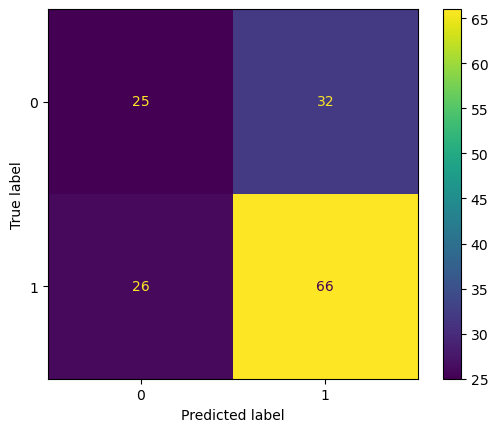

In [24]:
metrics.plot_confusion_matrix(clf, X_test, y_test) 

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
random_forest = RandomForestClassifier(n_estimators=1000, random_state=1)

In [27]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [28]:
y_pred = random_forest.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8590604026845637

In [29]:
print(metrics.f1_score(y_test, y_pred, average='binary'))
print(metrics.recall_score(y_test, y_pred, average='binary'))
print(metrics.precision_score(y_test, y_pred, average='binary'))

0.8864864864864864
0.8913043478260869
0.8817204301075269


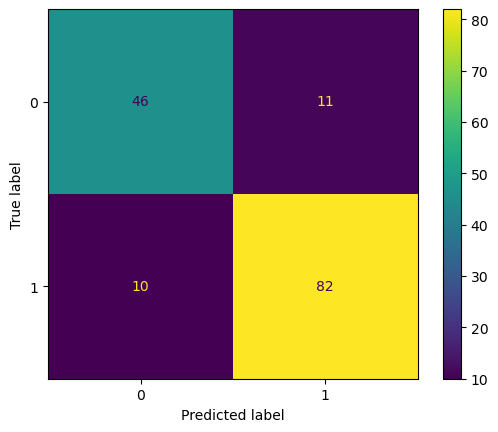

In [30]:
metrics.plot_confusion_matrix(random_forest, X_test, y_test) 

In [31]:
from sklearn.svm import SVC

In [32]:
Classifier = SVC(kernel='sigmoid', random_state=1, probability=True)

In [33]:
Classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True, random_state=1)

In [34]:
y_pred = Classifier.predict(X_test)

In [35]:
metrics.accuracy_score(y_test, y_pred)

0.7046979865771812

In [36]:
print(metrics.f1_score(y_test, y_pred, average='binary'))
print(metrics.recall_score(y_test, y_pred, average='binary'))
print(metrics.precision_score(y_test, y_pred, average='binary'))

0.7471264367816093
0.7065217391304348
0.7926829268292683


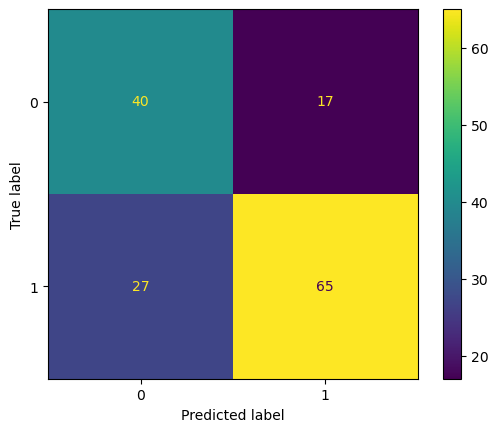

In [37]:
metrics.plot_confusion_matrix(Classifier, X_test, y_test) 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors = 21)

In [40]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [41]:
print(metrics.f1_score(y_test, y_pred, average='binary'))
print(metrics.recall_score(y_test, y_pred, average='binary'))
print(metrics.precision_score(y_test, y_pred, average='binary'))

0.8383838383838385
0.9021739130434783
0.7830188679245284


In [42]:
y_proba_mlp = clf.predict_proba(X_test)[::,1]
y_proba_rf = random_forest.predict_proba(X_test)[::1]
y_proba_knn = knn.predict_proba(X_test)[::,1]

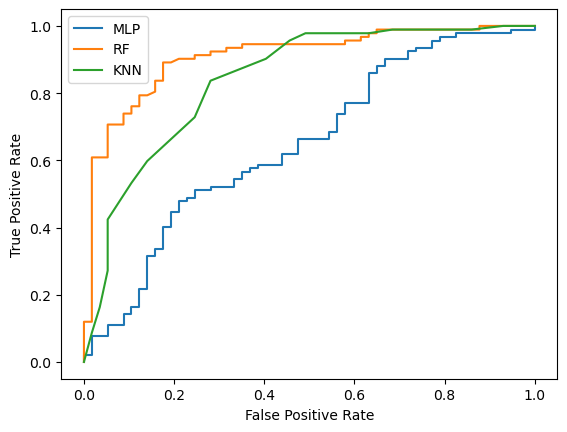

In [43]:
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_proba_mlp)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_proba_rf[:,1])
#fpr3, tpr3, _ = metrics.roc_curve(y_test, y_proba_svm)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_proba_knn)
plt.plot(fpr1,tpr1, label='MLP')
plt.plot(fpr2,tpr2, label='RF')
#x=1
#y=0
#plt.plot(x,y)
#plt.plot(fpr3,tpr3)
plt.plot(fpr4,tpr4, label='KNN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
pyplot.legend()
plt.show()

In [44]:
scores = cross_val_score(random_forest, X_test, y_test, cv=5, scoring='recall')
print(scores)
print(scores.mean())

[0.89473684 1.         0.88888889 0.77777778 0.77777778]
0.8678362573099415


In [45]:
scores = cross_val_score(random_forest, X_test, y_test, cv=5, scoring='precision')
print(scores)
print(scores.mean())

[0.77272727 0.76       0.88888889 0.82352941 0.82352941]
0.8137349970291146


In [46]:
scores = cross_val_score(random_forest, X_test, y_test, cv=5, scoring='f1')
print(scores)
print(scores.mean())

[0.82926829 0.86363636 0.88888889 0.8        0.8       ]
0.8363587090416358


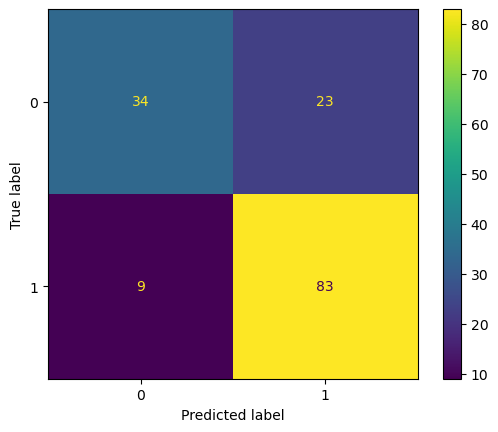

In [47]:
metrics.plot_confusion_matrix(knn, X_test, y_test) 

In [48]:
kf = StratifiedKFold(5)

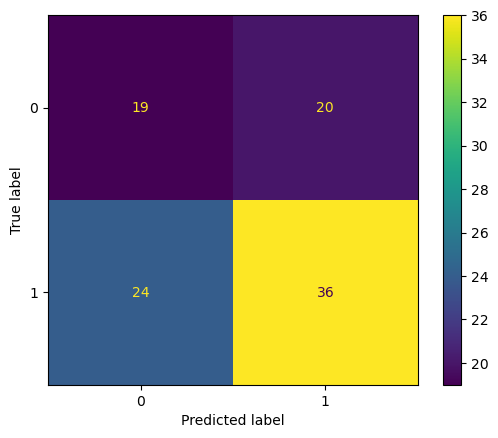

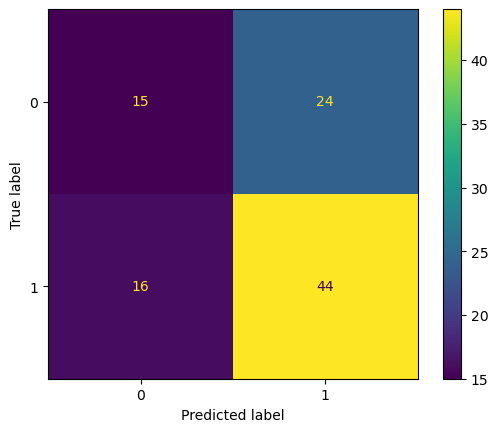

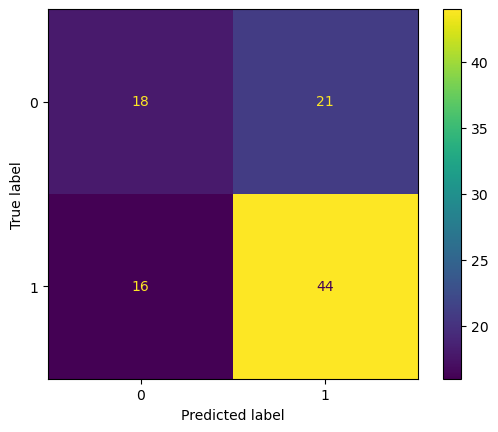

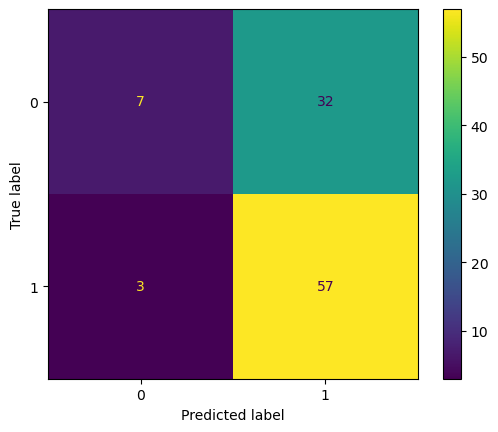

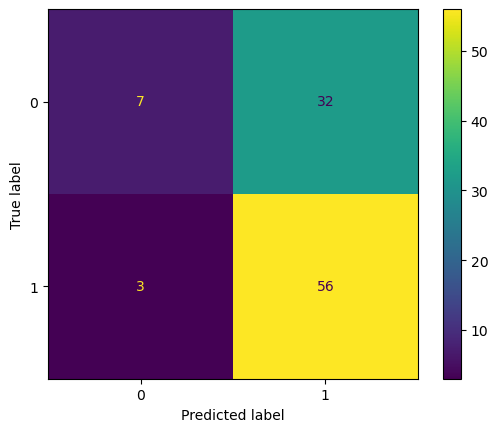

In [49]:
#MLP
mlp_f1 = []
mlp_recall = []
mlp_prec = []

for train_split, test_split in kf.split(x,y):
    X_train = x.iloc[train_split]
    y_train = y.iloc[train_split]
    X_test = x.iloc[test_split]
    y_test = y.iloc[test_split]
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    #mlp_f1 = []
    #mlp_recall = []
    #mlp_prec = []
    
    cm = metrics.plot_confusion_matrix(clf, X_test, y_test)
    #print(clf.score(X_test, y_test))
    mlp_f1.append(metrics.f1_score(y_test, y_pred, average='binary'))
    mlp_recall.append(metrics.recall_score(y_test, y_pred, average='binary'))
    mlp_prec.append(metrics.precision_score(y_test, y_pred, average='binary'))

In [50]:
print('mlp_f1: ', np.array(mlp_f1).mean())
print('mlp_recall: ', np.array(mlp_recall).mean())
print('mlp_prec: ', np.array(mlp_prec).mean())

mlp_f1:  0.7078390176436231
mlp_recall:  0.7931638418079097
mlp_prec:  0.648730423575103


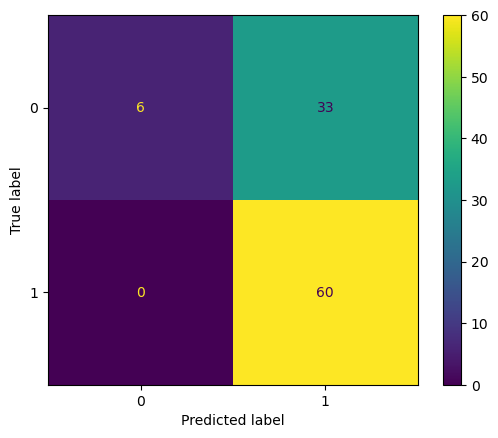

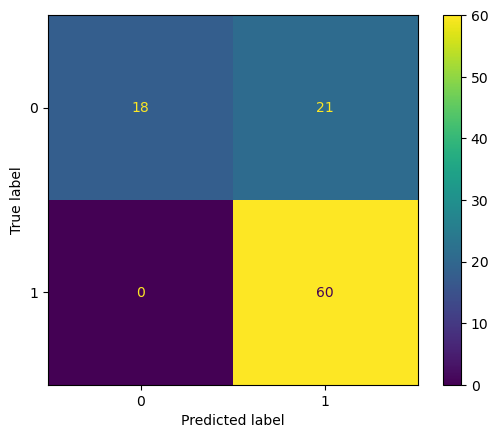

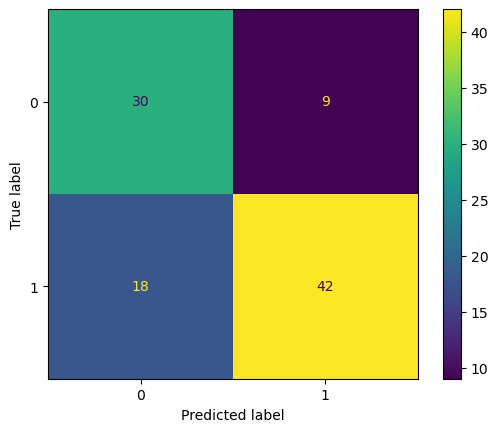

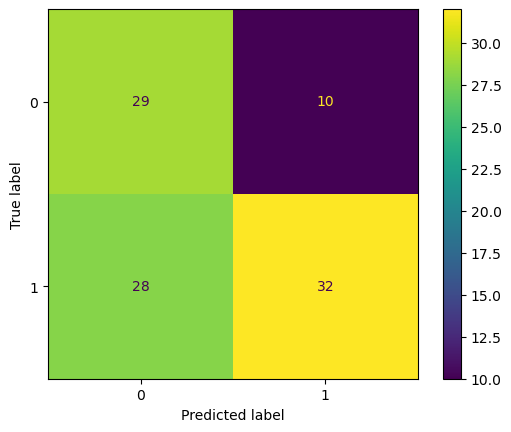

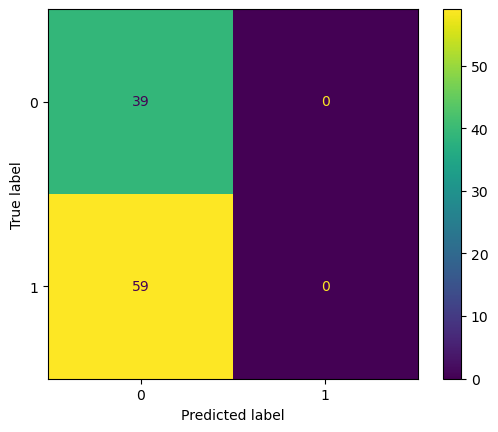

In [51]:
#RF
rf_f1 = []
rf_recall = []
rf_prec = []

for train_split, test_split in kf.split(x,y):
    X_train = x.iloc[train_split]
    y_train = y.iloc[train_split]
    X_test = x.iloc[test_split]
    y_test = y.iloc[test_split]
    
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    
    #rf_f1 = []
    #rf_recall = []
    #rf_prec = []
    
    cm = metrics.plot_confusion_matrix(random_forest, X_test, y_test)
    #print(clf.score(X_test, y_test))
    rf_f1.append(metrics.f1_score(y_test, y_pred, average='binary'))
    rf_recall.append(metrics.recall_score(y_test, y_pred, average='binary'))
    rf_prec.append(metrics.precision_score(y_test, y_pred, average='binary'))

In [52]:
print('rf_f1: ', np.array(rf_f1).mean())
print('rf_recall: ', np.array(rf_recall).mean())
print('rf_prec: ', np.array(rf_prec).mean())

rf_f1:  0.6039170584852688
rf_recall:  0.6466666666666667
rf_prec:  0.5942672409465578


In [53]:
'''#SVM
svm_f1 = []
svm_recall = []
svm_prec = []
for train_split, test_split in kf.split(x,y):
    X_train = x.iloc[train_split]
    y_train = y.iloc[train_split]
    X_test = x.iloc[test_split]
    y_test = y.iloc[test_split]
    
    Classifier.fit(X_train, y_train)
    y_pred = Classifier.predict(X_test)
    
    
    cm = metrics.plot_confusion_matrix(Classifier, X_test, y_test)
    #print(clf.score(X_test, y_test))
    svm_f1.append(metrics.f1_score(y_test, y_pred, average='binary'))
    svm_recall.append(metrics.recall_score(y_test, y_pred, average='binary'))
    svm_prec.append(metrics.precision_score(y_test, y_pred, average='binary'))'''

"#SVM\nsvm_f1 = []\nsvm_recall = []\nsvm_prec = []\nfor train_split, test_split in kf.split(x,y):\n    X_train = x.iloc[train_split]\n    y_train = y.iloc[train_split]\n    X_test = x.iloc[test_split]\n    y_test = y.iloc[test_split]\n    \n    Classifier.fit(X_train, y_train)\n    y_pred = Classifier.predict(X_test)\n    \n    \n    cm = metrics.plot_confusion_matrix(Classifier, X_test, y_test)\n    #print(clf.score(X_test, y_test))\n    svm_f1.append(metrics.f1_score(y_test, y_pred, average='binary'))\n    svm_recall.append(metrics.recall_score(y_test, y_pred, average='binary'))\n    svm_prec.append(metrics.precision_score(y_test, y_pred, average='binary'))"

In [54]:
#print('svm_f1: ', np.array(svm_f1).mean())
#print('svm_recall: ', np.array(svm_recall).mean())
#print('svm_prec: ', np.array(svm_prec).mean())

In [55]:
y_proba_mlp = clf.predict_proba(X_test)[::,1]

In [56]:
y_proba_rf = random_forest.predict_proba(X_test)[::1]

In [57]:
y_proba_svm = Classifier.predict_proba(X_test)[::,1]

In [58]:
y_proba_knn = knn.predict_proba(X_test)[::,1]

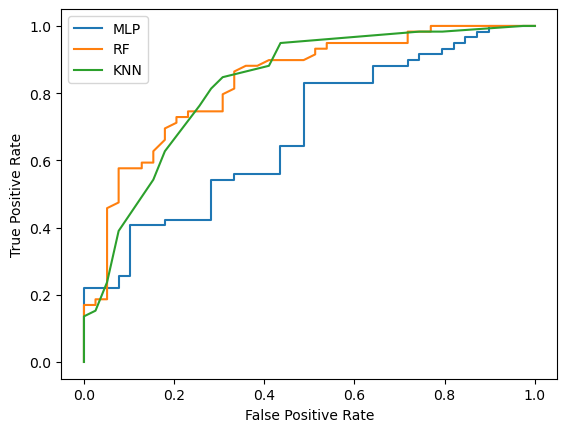

In [59]:
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_proba_mlp)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_proba_rf[:,1])
#fpr3, tpr3, _ = metrics.roc_curve(y_test, y_proba_svm)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_proba_knn)
plt.plot(fpr1,tpr1, label='MLP')
plt.plot(fpr2,tpr2, label='RF')
#x=1
#y=0
#plt.plot(x,y)
#plt.plot(fpr3,tpr3)
plt.plot(fpr4,tpr4, label='KNN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
pyplot.legend()
plt.show()

Graphs to test hyperparameters

In [60]:
clf = MLPClassifier(hidden_layer_sizes=(256,128),activation="logistic",random_state=0, max_iter=500, learning_rate = 'adaptive')
clf.fit(X_train, y_train)
logistic=clf.score(X_test, y_test)

In [61]:
clf = MLPClassifier(hidden_layer_sizes=(256,128),activation="identity",random_state=0, max_iter=500, learning_rate = 'adaptive')
clf.fit(X_train, y_train)
identity=clf.score(X_test, y_test)

In [62]:
clf = MLPClassifier(hidden_layer_sizes=(256,128),activation="tanh",random_state=0, max_iter=500, learning_rate = 'adaptive')
clf.fit(X_train, y_train)
tanh=clf.score(X_test, y_test)

In [63]:
clf = MLPClassifier(hidden_layer_sizes=(256,128),activation="relu",random_state=0, max_iter=500, learning_rate = 'adaptive')
clf.fit(X_train, y_train)
relu=clf.score(X_test, y_test)

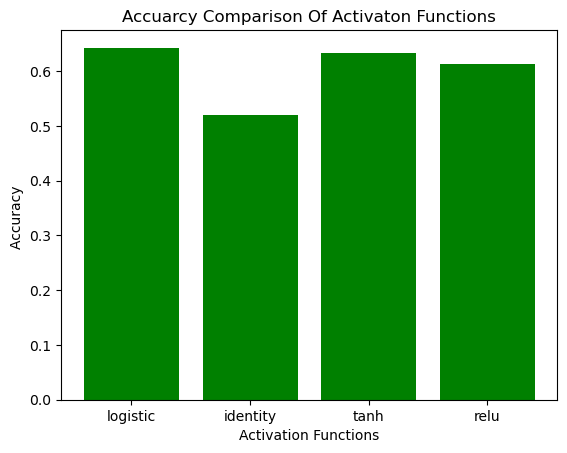

In [64]:
x=['logistic', 'identity', 'tanh', 'relu']

x_pos = [i for i, _ in enumerate(x)]
y=[logistic, identity, tanh, relu]
plt.bar(x_pos, y, color='green')
plt.xlabel("Activation Functions")
plt.ylabel("Accuracy ")
plt.title("Accuarcy Comparison Of Activaton Functions")

plt.xticks(x_pos, x)

plt.show()

In [65]:
#x = df[['Employees','Assets','Revenues','Totshequity']]
#x = df[['Employees','Assets','Revenues','Totshequity','Revchange']]
x = df[['Employees','Assets','Revenues','Totshequity','Revchange','Prftchange']]
y = df['outcome']

In [66]:
#X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1, test_size=0.2, shuffle=True)
X_train, X_test, y_train, y_test  =  train_test_split(x,y, test_size = 0.3, random_state = 1234667)


In [67]:
random_forest = RandomForestClassifier(n_estimators=10, random_state=1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
ten=metrics.accuracy_score(y_test, y_pred)

In [68]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=1, )
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
onehundred=metrics.accuracy_score(y_test, y_pred)

In [69]:
random_forest = RandomForestClassifier(n_estimators=1000, random_state=1, )
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
thousand=metrics.accuracy_score(y_test, y_pred)

In [70]:
print('10', ten)
print('100', onehundred)
print('500', thousand)

10 0.8120805369127517
100 0.8523489932885906
500 0.8590604026845637


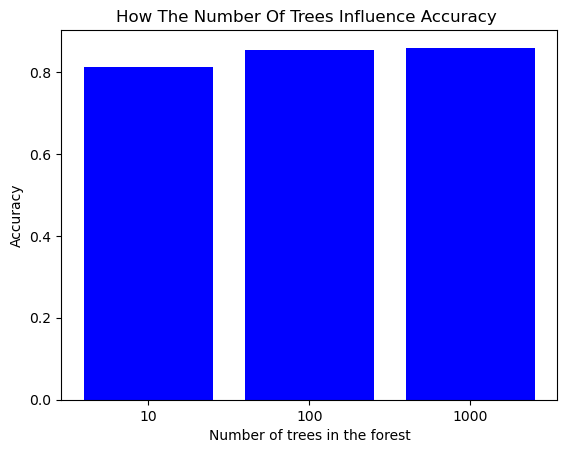

In [71]:
x=['10', '100', '1000']

x_pos = [i for i, _ in enumerate(x)]
y=[ten, onehundred, thousand]
plt.bar(x_pos, y, color='blue')
plt.xlabel("Number of trees in the forest")
plt.ylabel("Accuracy")
plt.title("How The Number Of Trees Influence Accuracy ")

plt.xticks(x_pos, x)

plt.show()

In [72]:
#x = df[['Employees','Assets','Revenues','Totshequity']]
x = df[['Employees','Assets','Revenues','Totshequity','Revchange']]
#x = df[['Employees','Assets','Revenues','Totshequity','Revchange','Prftchange']]
y = df['outcome']

In [73]:
#X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1, test_size=0.2, shuffle=True)
X_train, X_test, y_train, y_test  =  train_test_split(x,y, test_size = 0.3, random_state = 1234667)


In [74]:
Classifier = SVC(random_state=1, probability=True, kernel='rbf')
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)
rbf = metrics.accuracy_score(y_test, y_pred)

In [75]:
Classifier = SVC(random_state=1, probability=True, kernel='poly')
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)
poly = metrics.accuracy_score(y_test, y_pred)

In [76]:
Classifier = SVC(random_state=1, probability=True, kernel='sigmoid')
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)
sigmoid = metrics.accuracy_score(y_test, y_pred)

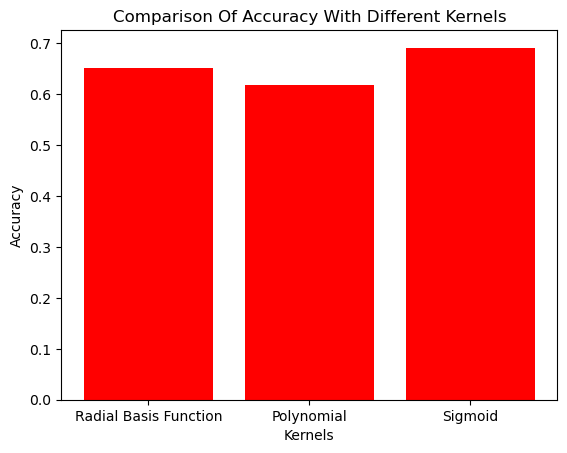

In [77]:
x=['Radial Basis Function', 'Polynomial', 'Sigmoid']

x_pos = [i for i, _ in enumerate(x)]
y=[rbf, poly, sigmoid]
plt.bar(x_pos, y, color='red')
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.title("Comparison Of Accuracy With Different Kernels")

plt.xticks(x_pos, x)

plt.show()

In [78]:
#x = df[['Employees','Assets','Revenues','Totshequity']]
#x = df[['Employees','Assets','Revenues','Totshequity','Revchange']]
x = df[['Employees','Assets','Revenues','Totshequity','Revchange','Prftchange']]
y = df['outcome']

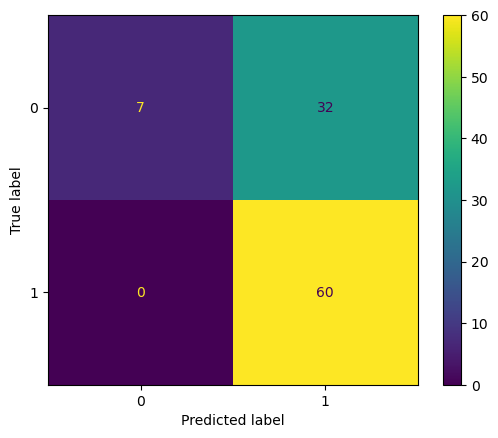

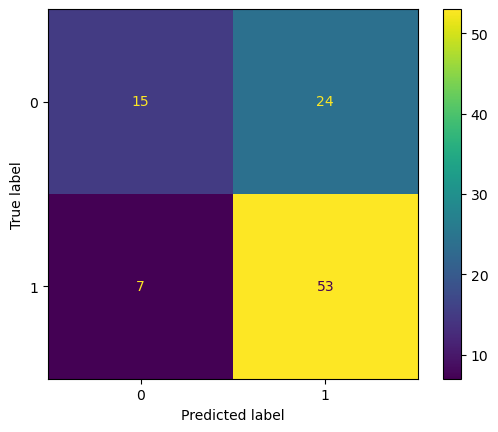

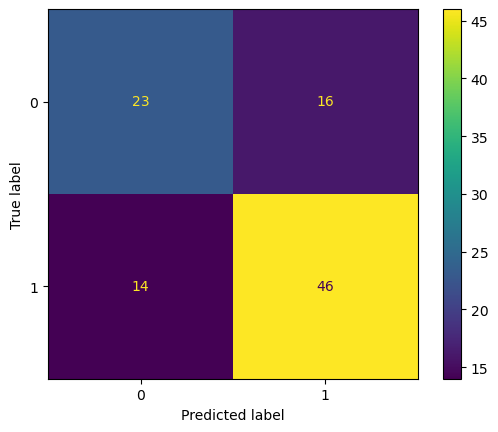

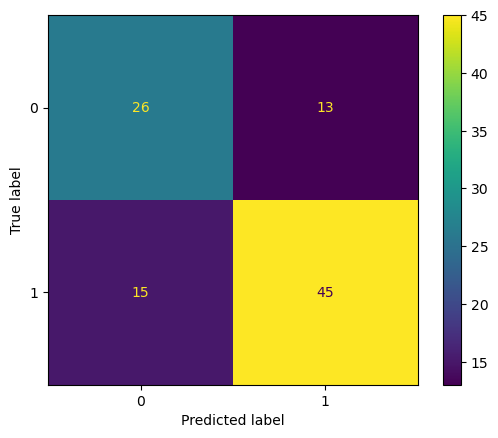

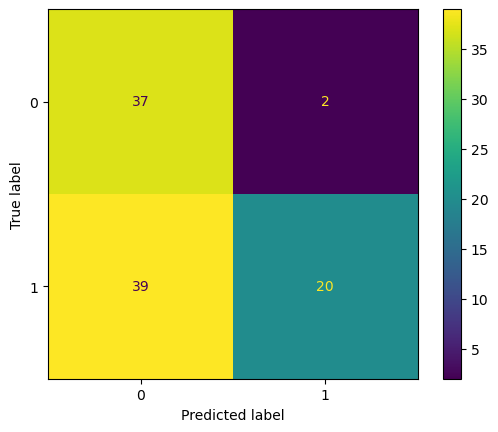

In [79]:
#KNN
knn_f1 = []
knn_recall = []
knn_prec = []

for train_split, test_split in kf.split(x,y):
    X_train = x.iloc[train_split]
    y_train = y.iloc[train_split]
    X_test = x.iloc[test_split]
    y_test = y.iloc[test_split]
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    cm = metrics.plot_confusion_matrix(knn, X_test, y_test)
    knn_f1.append(metrics.f1_score(y_test, y_pred, average='binary'))
    knn_recall.append(metrics.recall_score(y_test, y_pred, average='binary'))
    knn_prec.append(metrics.precision_score(y_test, y_pred, average='binary'))

In [80]:
print('knn_f1: ', np.array(knn_f1).mean())
print('knn_recall: ', np.array(knn_recall).mean())
print('knn_prec: ', np.array(knn_prec).mean())

knn_f1:  0.7147667395008194
knn_recall:  0.7477966101694915
knn_prec:  0.7534748126565123


In [81]:
#X_train, X_test, y_train, y_test  =  train_test_split(x,y, test_size = 0.3, random_state = 1234667)
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1234667, test_size=0.3, shuffle=True)

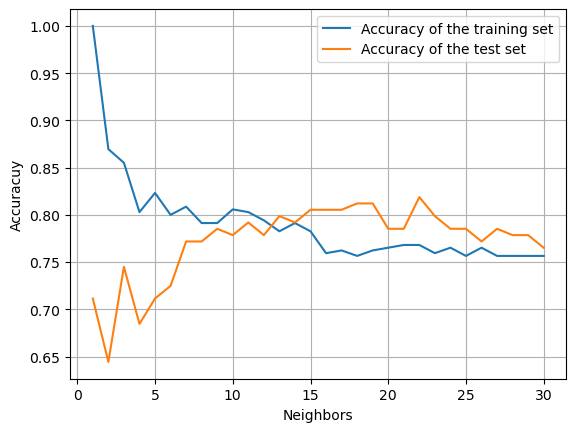

In [82]:
traing_acc = []
test_acc = []
# try KNN for diffrent k nearset neighbor from 1 to 50
neighbors_setting = range(1,31)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train.ravel())
    traing_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting, traing_acc, label = "Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label = "Accuracy of the test set")
plt.ylabel("Accuracuy")
plt.xlabel("Neighbors")
plt.grid()
plt.legend()

In [83]:
knn.score(x,y)

0.7591093117408907

In [84]:
from sklearn.model_selection import GridSearchCV
parametrs = {"n_neighbors": range(1,31) }
grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), #Model
                       param_grid = parametrs, #Range of K
                       scoring = "accuracy",
                       cv = 10,          # cross validation generator
                       verbose = 1,     #Time of calculate
                       n_jobs = -1)     #help to cpu
                       
            
                     
grid_knn.fit(X_train, y_train.ravel())

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy',
             verbose=1)

In [85]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [86]:
grid_knn.best_params_

{'n_neighbors': 19}

In [87]:
grid_knn.score(x,y)

0.7773279352226721

In [88]:
score=cross_val_score(grid_knn, x, y, cv=10)
score

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits


array([0.7       , 0.74      , 0.68      , 0.68      , 0.7755102 ,
       0.83673469, 0.7755102 , 0.7755102 , 0.65306122, 0.53061224])

In [89]:
score.mean()

0.7146938775510204

In [90]:
scores = cross_val_score(grid_knn, X_test, y_test, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
[0.93333333 0.8        0.6        0.73333333 0.66666667 0.73333333
 0.8        0.66666667 0.8        0.71428571]
0.7447619047619047


In [91]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

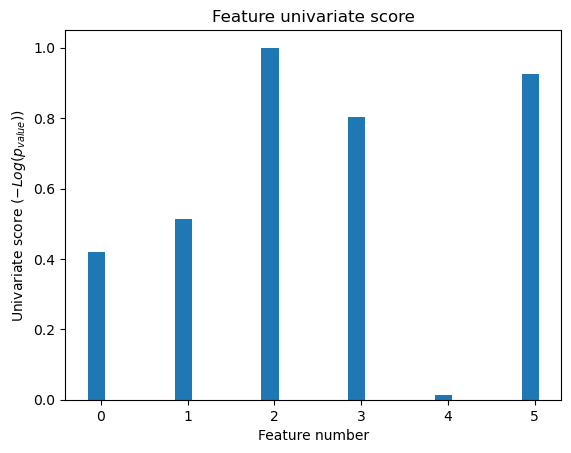

In [92]:
import matplotlib.pyplot as plt

X_indices = np.arange(x.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

Classification accuracy without selecting features: 0.772


In [94]:
clf_selected = make_pipeline(SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC())
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

Classification accuracy after univariate feature selection: 0.745


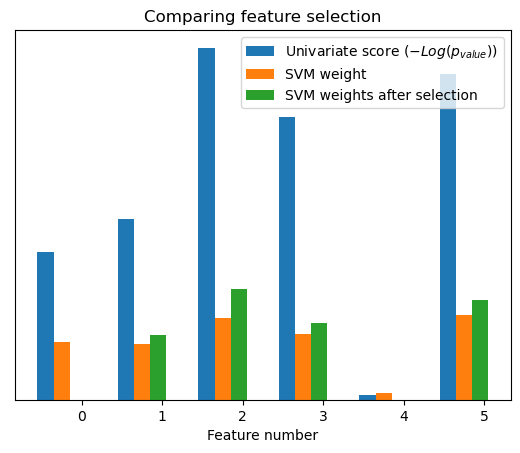

In [95]:
plt.bar(
    X_indices - 0.45, scores, width=0.2, label=r"Univariate score ($-Log(p_{value})$)"
)

plt.bar(X_indices - 0.25, svm_weights, width=0.2, label="SVM weight")

plt.bar(
    X_indices[selector.get_support()] - 0.05,
    svm_weights_selected,
    width=0.2,
    label="SVM weights after selection",
)

plt.title("Comparing feature selection")
plt.xlabel("Feature number")
plt.yticks(())
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()